# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *

#*Reference. A lot of the skeleton code I used came from the following blog. I had to change a lot of stuff though
#*Including their critic and actor models which werent optimal to learn this game. Also had to add some 
#*code to adjust learning rate to prevent exploding gradients. Also had to modify the training algorithm to solve
#*for multiple agents on the 20 agent reacher game. 

#*https://towardsdatascience.com/deep-deterministic-policy-gradients-explained-2d94655a9b7b

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [ ]:
#env = UnityEnvironment(file_name='...')
env = UnityEnvironment(file_name="Reacher_1_agent.app.app")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
Game Number: 1
Total score (averaged over agents) this episode: 0.8799999803304672
Game Number: 2
Total score (averaged over agents) this episode: 0.0
Game Number: 3
Total score (averaged over agents) this episode: 0.0
Game Number: 4
Total score (averaged over agents) this episode: 1.1599999740719795
Game Number: 5
To

Total score (averaged over agents) this episode: 4.109999908134341
Game Number: 93
Total score (averaged over agents) this episode: 2.0199999548494816
Game Number: 94
Total score (averaged over agents) this episode: 3.709999917075038
Game Number: 95
Total score (averaged over agents) this episode: 2.2799999490380287
Game Number: 96
Total score (averaged over agents) this episode: 4.119999907910824
Game Number: 97
Total score (averaged over agents) this episode: 4.069999909028411
Game Number: 98
Total score (averaged over agents) this episode: 4.369999902322888
Game Number: 99
Total score (averaged over agents) this episode: 4.689999895170331
Model Saved: MODEL_CHECKPOINT.9363026.actor.pt
Model Saved: MODEL_CHECKPOINT.9363026.actor_target.pt
Model Saved: MODEL_CHECKPOINT.9363026.critic.pt
Model Saved: MODEL_CHECKPOINT.9363026.critic_target.pt
Moving Avg 100 episodes: 2.282121161111828
Game Number: 100
Total score (averaged over agents) this episode: 3.209999928250909
Game Number: 101
To

Total score (averaged over agents) this episode: 4.279999904334545
Game Number: 188
Total score (averaged over agents) this episode: 5.639999873936176
Game Number: 189
Total score (averaged over agents) this episode: 3.449999922886491
Game Number: 190
Total score (averaged over agents) this episode: 6.269999859854579
Game Number: 191
Total score (averaged over agents) this episode: 5.169999884441495
Game Number: 192
Total score (averaged over agents) this episode: 4.789999892935157
Game Number: 193
Total score (averaged over agents) this episode: 5.079999886453152
Game Number: 194
Total score (averaged over agents) this episode: 3.0499999318271875
Game Number: 195
Total score (averaged over agents) this episode: 3.469999922439456
Game Number: 196
Total score (averaged over agents) this episode: 2.4299999456852674
Game Number: 197
Total score (averaged over agents) this episode: 6.6599998511374
Game Number: 198
Total score (averaged over agents) this episode: 3.729999916628003
Game Numb

Total score (averaged over agents) this episode: 4.21999990567565
Game Number: 283
Total score (averaged over agents) this episode: 8.549999808892608
Game Number: 284
Total score (averaged over agents) this episode: 11.719999738037586
Game Number: 285
Total score (averaged over agents) this episode: 7.04999984242022
Game Number: 286
Total score (averaged over agents) this episode: 8.659999806433916
Game Number: 287
Total score (averaged over agents) this episode: 7.839999824762344
Game Number: 288
Total score (averaged over agents) this episode: 8.199999816715717
Game Number: 289
Total score (averaged over agents) this episode: 9.119999796152115
Game Number: 290
Total score (averaged over agents) this episode: 7.089999841526151
Game Number: 291
Total score (averaged over agents) this episode: 5.7299998719245195
Game Number: 292
Total score (averaged over agents) this episode: 6.719999849796295
Game Number: 293
Total score (averaged over agents) this episode: 2.849999936297536
Game Numb

Total score (averaged over agents) this episode: 15.639999650418758
Game Number: 378
Total score (averaged over agents) this episode: 5.019999887794256
Game Number: 379
Total score (averaged over agents) this episode: 8.089999819174409
Game Number: 380
Total score (averaged over agents) this episode: 15.02999966405332
Game Number: 381
Total score (averaged over agents) this episode: 10.949999755248427
Game Number: 382
Total score (averaged over agents) this episode: 9.049999797716737
Game Number: 383
Total score (averaged over agents) this episode: 5.469999877735972
Game Number: 384
Total score (averaged over agents) this episode: 9.929999778047204
Game Number: 385
Total score (averaged over agents) this episode: 14.589999673888087
Game Number: 386
Total score (averaged over agents) this episode: 12.849999712780118
Game Number: 387
Total score (averaged over agents) this episode: 13.459999699145555
Game Number: 388
Total score (averaged over agents) this episode: 11.979999732226133
Gam

Total score (averaged over agents) this episode: 6.679999850690365
Game Number: 472
Total score (averaged over agents) this episode: 12.619999717921019
Game Number: 473
Total score (averaged over agents) this episode: 13.249999703839421
Game Number: 474
Total score (averaged over agents) this episode: 13.489999698475003
Game Number: 475
Total score (averaged over agents) this episode: 9.48999978788197
Game Number: 476
Total score (averaged over agents) this episode: 7.329999836161733
Game Number: 477
Total score (averaged over agents) this episode: 9.999999776482582
Game Number: 478
Total score (averaged over agents) this episode: 15.929999643936753
Game Number: 479
Total score (averaged over agents) this episode: 18.139999594539404
Game Number: 480
Total score (averaged over agents) this episode: 13.269999703392386
Game Number: 481
Total score (averaged over agents) this episode: 17.339999612420797
Game Number: 482
Total score (averaged over agents) this episode: 12.449999721720815
Ga

Total score (averaged over agents) this episode: 23.53999947384
Game Number: 566
Total score (averaged over agents) this episode: 22.06999950669706
Game Number: 567
Total score (averaged over agents) this episode: 13.259999703615904
Game Number: 568
Total score (averaged over agents) this episode: 18.309999590739608
Game Number: 569
Total score (averaged over agents) this episode: 21.349999522790313
Game Number: 570
Total score (averaged over agents) this episode: 12.419999722391367
Game Number: 571
Total score (averaged over agents) this episode: 17.179999615997076
Game Number: 572
Total score (averaged over agents) this episode: 18.869999578222632
Game Number: 573
Total score (averaged over agents) this episode: 19.859999556094408
Game Number: 574
Total score (averaged over agents) this episode: 17.669999605044723
Game Number: 575
Total score (averaged over agents) this episode: 13.039999708533287
Game Number: 576
Total score (averaged over agents) this episode: 20.149999549612403
Ga

Total score (averaged over agents) this episode: 25.97999941930175
Game Number: 660
Total score (averaged over agents) this episode: 20.969999531283975
Game Number: 661
Total score (averaged over agents) this episode: 26.169999415054917
Game Number: 662
Total score (averaged over agents) this episode: 24.539999451488256
Game Number: 663
Total score (averaged over agents) this episode: 20.089999550953507
Game Number: 664
Total score (averaged over agents) this episode: 21.089999528601766
Game Number: 665
Total score (averaged over agents) this episode: 28.57999936118722
Game Number: 666
Total score (averaged over agents) this episode: 20.429999543353915
Game Number: 667
Total score (averaged over agents) this episode: 27.52999938465655
Game Number: 668
Total score (averaged over agents) this episode: 21.779999513179064
Game Number: 669
Total score (averaged over agents) this episode: 21.519999518990517
Game Number: 670
Total score (averaged over agents) this episode: 22.679999493062496


Total score (averaged over agents) this episode: 27.859999377280474
Game Number: 749
Total score (averaged over agents) this episode: 24.81999944522977
Game Number: 750
Total score (averaged over agents) this episode: 28.61999936029315
Game Number: 751
Total score (averaged over agents) this episode: 25.589999428018928
Game Number: 752
Total score (averaged over agents) this episode: 22.509999496862292
Game Number: 753
Total score (averaged over agents) this episode: 24.719999447464943
Game Number: 754
Total score (averaged over agents) this episode: 24.459999453276396
Game Number: 755
Total score (averaged over agents) this episode: 30.89999930933118
Scored over 30, great job little agent!
Game Number: 756
Total score (averaged over agents) this episode: 31.899999286979437
Scored over 30, great job little agent!
Game Number: 757
Total score (averaged over agents) this episode: 28.65999935939908
Game Number: 758
Total score (averaged over agents) this episode: 24.879999443888664
Game N

Total score (averaged over agents) this episode: 22.519999496638775
Game Number: 839
Total score (averaged over agents) this episode: 32.06999928317964
Scored over 30, great job little agent!
Game Number: 840
Total score (averaged over agents) this episode: 29.38999934308231
Game Number: 841
Total score (averaged over agents) this episode: 25.149999437853694
Game Number: 842
Total score (averaged over agents) this episode: 25.66999942623079
Game Number: 843
Total score (averaged over agents) this episode: 22.789999490603805
Game Number: 844
Total score (averaged over agents) this episode: 29.89999933168292
Game Number: 845
Total score (averaged over agents) this episode: 25.899999421089888
Game Number: 846
Total score (averaged over agents) this episode: 32.05999928340316
Scored over 30, great job little agent!
Game Number: 847
Total score (averaged over agents) this episode: 29.23999934643507
Game Number: 848
Total score (averaged over agents) this episode: 23.809999467805028
Game Num

Total score (averaged over agents) this episode: 27.02999939583242
Game Number: 930
Total score (averaged over agents) this episode: 26.59999940544367
Game Number: 931
Total score (averaged over agents) this episode: 25.109999438747764
Game Number: 932
Total score (averaged over agents) this episode: 28.129999371245503
Game Number: 933
Total score (averaged over agents) this episode: 26.739999402314425
Game Number: 934
Total score (averaged over agents) this episode: 25.809999423101544
Game Number: 935
Total score (averaged over agents) this episode: 26.729999402537942
Game Number: 936
Total score (averaged over agents) this episode: 21.399999521672726
Game Number: 937
Total score (averaged over agents) this episode: 23.609999472275376
Game Number: 938
Total score (averaged over agents) this episode: 26.869999399408698
Game Number: 939
Total score (averaged over agents) this episode: 27.68999938108027
Game Number: 940
Total score (averaged over agents) this episode: 24.639999449253082


Total score (averaged over agents) this episode: 31.739999290555716
Scored over 30, great job little agent!
Game Number: 1019
Total score (averaged over agents) this episode: 27.179999392479658
Game Number: 1020
Total score (averaged over agents) this episode: 27.25999939069152
Game Number: 1021
Total score (averaged over agents) this episode: 28.089999372139573
Game Number: 1022
Total score (averaged over agents) this episode: 29.42999934218824
Game Number: 1023
Total score (averaged over agents) this episode: 26.389999410137534
Game Number: 1024
Total score (averaged over agents) this episode: 28.829999355599284
Game Number: 1025
Total score (averaged over agents) this episode: 24.15999945998192
Game Number: 1026
Total score (averaged over agents) this episode: 26.94999939762056
Game Number: 1027
Total score (averaged over agents) this episode: 30.889999309554696
Scored over 30, great job little agent!
Game Number: 1028
Total score (averaged over agents) this episode: 26.979999396950

Total score (averaged over agents) this episode: 23.31999947875738
Game Number: 1109
Total score (averaged over agents) this episode: 24.959999442100525
Game Number: 1110
Total score (averaged over agents) this episode: 20.669999537989497
Game Number: 1111
Total score (averaged over agents) this episode: 30.199999324977398
Scored over 30, great job little agent!
Game Number: 1112
Total score (averaged over agents) this episode: 24.229999458417296
Game Number: 1113
Total score (averaged over agents) this episode: 30.219999324530363
Scored over 30, great job little agent!
Game Number: 1114
Total score (averaged over agents) this episode: 24.769999446347356
Game Number: 1115
Total score (averaged over agents) this episode: 30.419999320060015
Scored over 30, great job little agent!
Game Number: 1116
Total score (averaged over agents) this episode: 23.919999465346336
Game Number: 1117
Total score (averaged over agents) this episode: 30.489999318495393
Scored over 30, great job little agent!

Total score (averaged over agents) this episode: 24.149999460205436
Game Number: 1198
Total score (averaged over agents) this episode: 27.799999378621578
Game Number: 1199
Total score (averaged over agents) this episode: 26.499999407678843
Model Saved: MODEL_CHECKPOINT.6108552.actor.pt
Model Saved: MODEL_CHECKPOINT.6108552.actor_target.pt
Model Saved: MODEL_CHECKPOINT.6108552.critic.pt
Model Saved: MODEL_CHECKPOINT.6108552.critic_target.pt
Moving Avg 100 episodes: 26.493399407826363
Game Number: 1200
Total score (averaged over agents) this episode: 30.259999323636293
Scored over 30, great job little agent!
Game Number: 1201
Total score (averaged over agents) this episode: 30.579999316483736
Scored over 30, great job little agent!
Game Number: 1202
Total score (averaged over agents) this episode: 23.949999464675784
Game Number: 1203
Total score (averaged over agents) this episode: 33.73999924585223
Scored over 30, great job little agent!
Game Number: 1204
Total score (averaged over agen

Total score (averaged over agents) this episode: 22.289999501779675
Game Number: 1283
Total score (averaged over agents) this episode: 26.709999402984977
Game Number: 1284
Total score (averaged over agents) this episode: 22.69999949261546
Game Number: 1285
Total score (averaged over agents) this episode: 27.10999939404428
Game Number: 1286
Total score (averaged over agents) this episode: 25.149999437853694
Game Number: 1287
Total score (averaged over agents) this episode: 23.759999468922615
Game Number: 1288
Total score (averaged over agents) this episode: 29.889999331906438
Game Number: 1289
Total score (averaged over agents) this episode: 28.279999367892742
Game Number: 1290
Total score (averaged over agents) this episode: 27.479999385774136
Game Number: 1291
Total score (averaged over agents) this episode: 22.019999507814646
Game Number: 1292
Total score (averaged over agents) this episode: 23.149999482557178
Game Number: 1293
Total score (averaged over agents) this episode: 28.6799

Total score (averaged over agents) this episode: 26.359999410808086
Game Number: 1370
Total score (averaged over agents) this episode: 24.069999461993575
Game Number: 1371
Total score (averaged over agents) this episode: 25.259999435395002
Game Number: 1372
Total score (averaged over agents) this episode: 21.68999951519072
Game Number: 1373
Total score (averaged over agents) this episode: 22.449999498203397
Game Number: 1374
Total score (averaged over agents) this episode: 28.259999368339777
Game Number: 1375
Total score (averaged over agents) this episode: 22.909999487921596
Game Number: 1376
Total score (averaged over agents) this episode: 27.969999374821782
Game Number: 1377
Total score (averaged over agents) this episode: 24.909999443218112
Game Number: 1378
Total score (averaged over agents) this episode: 32.469999274238944
Scored over 30, great job little agent!
Game Number: 1379
Total score (averaged over agents) this episode: 27.509999385103583
Game Number: 1380
Total score (av

Total score (averaged over agents) this episode: 26.969999397173524
Game Number: 1458
Total score (averaged over agents) this episode: 33.33999925479293
Scored over 30, great job little agent!
Game Number: 1459
Total score (averaged over agents) this episode: 23.289999479427934
Game Number: 1460
Total score (averaged over agents) this episode: 30.01999932900071
Scored over 30, great job little agent!
Game Number: 1461
Total score (averaged over agents) this episode: 24.119999460875988
Game Number: 1462
Total score (averaged over agents) this episode: 27.18999939225614
Game Number: 1463
Total score (averaged over agents) this episode: 28.939999353140593
Game Number: 1464
Total score (averaged over agents) this episode: 23.089999483898282
Game Number: 1465
Total score (averaged over agents) this episode: 22.42999949865043
Game Number: 1466
Total score (averaged over agents) this episode: 26.99999939650297
Game Number: 1467
Total score (averaged over agents) this episode: 24.9599994421005

Total score (averaged over agents) this episode: 21.749999513849616
Game Number: 1547
Total score (averaged over agents) this episode: 23.089999483898282
Game Number: 1548
Total score (averaged over agents) this episode: 30.349999321624637
Scored over 30, great job little agent!
Game Number: 1549
Total score (averaged over agents) this episode: 28.19999936968088
Game Number: 1550
Total score (averaged over agents) this episode: 28.649999359622598
Game Number: 1551
Total score (averaged over agents) this episode: 28.45999936386943
Game Number: 1552
Total score (averaged over agents) this episode: 27.41999938711524
Game Number: 1553
Total score (averaged over agents) this episode: 29.839999333024025
Game Number: 1554
Total score (averaged over agents) this episode: 27.019999396055937
Game Number: 1555
Total score (averaged over agents) this episode: 26.119999416172504
Game Number: 1556
Total score (averaged over agents) this episode: 29.769999334588647
Game Number: 1557
Total score (aver

Total score (averaged over agents) this episode: 25.55999942868948
Game Number: 1637
Total score (averaged over agents) this episode: 28.10999937169254
Game Number: 1638
Total score (averaged over agents) this episode: 28.259999368339777
Game Number: 1639
Total score (averaged over agents) this episode: 23.3099994789809
Game Number: 1640
Total score (averaged over agents) this episode: 27.859999377280474
Game Number: 1641
Total score (averaged over agents) this episode: 21.99999950826168
Game Number: 1642
Total score (averaged over agents) this episode: 24.289999457076192
Game Number: 1643
Total score (averaged over agents) this episode: 30.459999319165945
Scored over 30, great job little agent!
Game Number: 1644
Total score (averaged over agents) this episode: 22.749999491497874
Game Number: 1645
Total score (averaged over agents) this episode: 23.599999472498894
Game Number: 1646
Total score (averaged over agents) this episode: 27.329999389126897
Game Number: 1647
Total score (averag

Total score (averaged over agents) this episode: 26.009999418631196
Game Number: 1725
Total score (averaged over agents) this episode: 22.609999494627118
Game Number: 1726
Total score (averaged over agents) this episode: 28.239999368786812
Game Number: 1727
Total score (averaged over agents) this episode: 25.039999440312386
Game Number: 1728
Total score (averaged over agents) this episode: 24.77999944612384
Game Number: 1729
Total score (averaged over agents) this episode: 26.239999413490295
Game Number: 1730
Total score (averaged over agents) this episode: 31.32999929971993
Scored over 30, great job little agent!
Game Number: 1731
Total score (averaged over agents) this episode: 28.19999936968088
Game Number: 1732
Total score (averaged over agents) this episode: 23.719999469816685
Game Number: 1733
Total score (averaged over agents) this episode: 28.099999371916056
Game Number: 1734
Total score (averaged over agents) this episode: 25.74999942444265
Game Number: 1735
Total score (avera

Total score (averaged over agents) this episode: 29.03999935090542
Game Number: 1813
Total score (averaged over agents) this episode: 30.12999932654202
Scored over 30, great job little agent!
Game Number: 1814
Total score (averaged over agents) this episode: 28.529999362304807
Game Number: 1815
Total score (averaged over agents) this episode: 26.83999940007925
Game Number: 1816
Total score (averaged over agents) this episode: 24.229999458417296
Game Number: 1817
Total score (averaged over agents) this episode: 26.36999941058457
Game Number: 1818
Total score (averaged over agents) this episode: 24.489999452605844
Game Number: 1819
Total score (averaged over agents) this episode: 28.209999369457364
Game Number: 1820
Total score (averaged over agents) this episode: 26.739999402314425
Game Number: 1821
Total score (averaged over agents) this episode: 34.249999234452844
Scored over 30, great job little agent!
Game Number: 1822
Total score (averaged over agents) this episode: 29.029999351128

Total score (averaged over agents) this episode: 28.139999371021986
Game Number: 1901
Total score (averaged over agents) this episode: 28.61999936029315
Game Number: 1902
Total score (averaged over agents) this episode: 24.729999447241426
Game Number: 1903
Total score (averaged over agents) this episode: 27.60999938286841
Game Number: 1904
Total score (averaged over agents) this episode: 27.209999391809106
Game Number: 1905
Total score (averaged over agents) this episode: 24.609999449923635
Game Number: 1906
Total score (averaged over agents) this episode: 27.079999394714832
Game Number: 1907
Total score (averaged over agents) this episode: 27.4999993853271
Game Number: 1908
Total score (averaged over agents) this episode: 27.389999387785792
Game Number: 1909
Total score (averaged over agents) this episode: 30.779999312013388
Scored over 30, great job little agent!
Game Number: 1910
Total score (averaged over agents) this episode: 27.519999384880066
Game Number: 1911
Total score (avera

Total score (averaged over agents) this episode: 26.189999414607882
Game Number: 1992
Total score (averaged over agents) this episode: 30.179999325424433
Scored over 30, great job little agent!
Game Number: 1993
Total score (averaged over agents) this episode: 20.079999551177025
Game Number: 1994
Total score (averaged over agents) this episode: 32.159999281167984
Scored over 30, great job little agent!
Game Number: 1995
Total score (averaged over agents) this episode: 20.379999544471502
Game Number: 1996
Total score (averaged over agents) this episode: 33.48999925144017
Scored over 30, great job little agent!
Game Number: 1997
Total score (averaged over agents) this episode: 27.549999384209514
Game Number: 1998
Total score (averaged over agents) this episode: 22.799999490380287
Game Number: 1999
Total score (averaged over agents) this episode: 29.019999351352453
Model Saved: MODEL_CHECKPOINT.1900072.actor.pt
Model Saved: MODEL_CHECKPOINT.1900072.actor_target.pt
Model Saved: MODEL_CHECK

Total score (averaged over agents) this episode: 27.679999381303787
Game Number: 2080
Total score (averaged over agents) this episode: 24.139999460428953
Game Number: 2081
Total score (averaged over agents) this episode: 28.76999935694039
Game Number: 2082
Total score (averaged over agents) this episode: 19.499999564141035
Game Number: 2083
Total score (averaged over agents) this episode: 23.479999475181103
Game Number: 2084
Total score (averaged over agents) this episode: 25.269999435171485
Game Number: 2085
Total score (averaged over agents) this episode: 28.19999936968088
Game Number: 2086
Total score (averaged over agents) this episode: 22.95999948680401
Game Number: 2087
Total score (averaged over agents) this episode: 22.709999492391944
Game Number: 2088
Total score (averaged over agents) this episode: 28.569999361410737
Game Number: 2089
Total score (averaged over agents) this episode: 25.539999429136515
Game Number: 2090
Total score (averaged over agents) this episode: 31.93999

Total score (averaged over agents) this episode: 30.43999931961298
Scored over 30, great job little agent!
Game Number: 2165
Total score (averaged over agents) this episode: 26.749999402090907
Game Number: 2166
Total score (averaged over agents) this episode: 27.589999383315444
Game Number: 2167
Total score (averaged over agents) this episode: 29.889999331906438
Game Number: 2168
Total score (averaged over agents) this episode: 19.809999557211995
Game Number: 2169
Total score (averaged over agents) this episode: 21.539999518543482
Game Number: 2170
Total score (averaged over agents) this episode: 26.749999402090907
Game Number: 2171
Total score (averaged over agents) this episode: 29.569999339058995
Game Number: 2172
Total score (averaged over agents) this episode: 27.079999394714832
Game Number: 2173
Total score (averaged over agents) this episode: 27.409999387338758
Game Number: 2174
Total score (averaged over agents) this episode: 26.929999398067594
Game Number: 2175
Total score (av

Total score (averaged over agents) this episode: 28.569999361410737
Game Number: 2253
Total score (averaged over agents) this episode: 28.289999367669225
Game Number: 2254
Total score (averaged over agents) this episode: 28.449999364092946
Game Number: 2255
Total score (averaged over agents) this episode: 25.739999424666166
Game Number: 2256
Total score (averaged over agents) this episode: 29.65999933704734
Game Number: 2257
Total score (averaged over agents) this episode: 24.43999945372343
Game Number: 2258
Total score (averaged over agents) this episode: 23.57999947294593
Game Number: 2259
Total score (averaged over agents) this episode: 27.799999378621578
Game Number: 2260
Total score (averaged over agents) this episode: 31.429999297484756
Scored over 30, great job little agent!
Game Number: 2261
Total score (averaged over agents) this episode: 34.47999922931194
Scored over 30, great job little agent!
Game Number: 2262
Total score (averaged over agents) this episode: 17.719999603927

Total score (averaged over agents) this episode: 16.14999963901937
Game Number: 2338
Total score (averaged over agents) this episode: 29.799999333918095
Game Number: 2339
Total score (averaged over agents) this episode: 25.429999431595206
Game Number: 2340
Total score (averaged over agents) this episode: 28.88999935425818
Game Number: 2341
Total score (averaged over agents) this episode: 29.569999339058995
Game Number: 2342
Total score (averaged over agents) this episode: 25.299999434500933
Game Number: 2343
Total score (averaged over agents) this episode: 28.789999356493354
Game Number: 2344
Total score (averaged over agents) this episode: 25.419999431818724
Game Number: 2345
Total score (averaged over agents) this episode: 22.30999950133264
Game Number: 2346
Total score (averaged over agents) this episode: 22.96999948658049
Game Number: 2347
Total score (averaged over agents) this episode: 22.06999950669706
Game Number: 2348
Total score (averaged over agents) this episode: 28.3299993

Total score (averaged over agents) this episode: 28.789999356493354
Game Number: 2427
Total score (averaged over agents) this episode: 24.74999944679439
Game Number: 2428
Total score (averaged over agents) this episode: 23.409999476745725
Game Number: 2429
Total score (averaged over agents) this episode: 24.539999451488256
Game Number: 2430
Total score (averaged over agents) this episode: 27.549999384209514
Game Number: 2431
Total score (averaged over agents) this episode: 31.539999295026064
Scored over 30, great job little agent!
Game Number: 2432
Total score (averaged over agents) this episode: 18.459999587386847
Game Number: 2433
Total score (averaged over agents) this episode: 26.439999409019947
Game Number: 2434
Total score (averaged over agents) this episode: 23.42999947629869
Game Number: 2435
Total score (averaged over agents) this episode: 31.16999930329621
Scored over 30, great job little agent!
Game Number: 2436
Total score (averaged over agents) this episode: 23.52999947406

Total score (averaged over agents) this episode: 30.349999321624637
Scored over 30, great job little agent!
Game Number: 2513
Total score (averaged over agents) this episode: 27.349999388679862
Game Number: 2514
Total score (averaged over agents) this episode: 20.79999953508377
Game Number: 2515
Total score (averaged over agents) this episode: 29.789999334141612
Game Number: 2516
Total score (averaged over agents) this episode: 17.46999960951507
Game Number: 2517
Total score (averaged over agents) this episode: 30.159999325871468
Scored over 30, great job little agent!
Game Number: 2518
Total score (averaged over agents) this episode: 26.6399994045496
Game Number: 2519
Total score (averaged over agents) this episode: 30.719999313354492
Scored over 30, great job little agent!
Game Number: 2520
Total score (averaged over agents) this episode: 27.699999380856752
Game Number: 2521
Total score (averaged over agents) this episode: 20.399999544024467
Game Number: 2522
Total score (averaged ov

Total score (averaged over agents) this episode: 26.99999939650297
Game Number: 2601
Total score (averaged over agents) this episode: 28.069999372586608
Game Number: 2602
Total score (averaged over agents) this episode: 28.089999372139573
Game Number: 2603
Total score (averaged over agents) this episode: 23.749999469146132
Game Number: 2604
Total score (averaged over agents) this episode: 29.289999345317483
Game Number: 2605
Total score (averaged over agents) this episode: 24.82999944500625
Game Number: 2606
Total score (averaged over agents) this episode: 27.53999938443303
Game Number: 2607
Total score (averaged over agents) this episode: 26.159999415278435
Game Number: 2608
Total score (averaged over agents) this episode: 23.019999485462904
Game Number: 2609
Total score (averaged over agents) this episode: 29.409999342635274
Game Number: 2610
Total score (averaged over agents) this episode: 29.149999348446727
Game Number: 2611
Total score (averaged over agents) this episode: 29.37999

Total score (averaged over agents) this episode: 25.9499994199723
Game Number: 2690
Total score (averaged over agents) this episode: 26.849999399855733
Game Number: 2691
Total score (averaged over agents) this episode: 27.33999938890338
Game Number: 2692
Total score (averaged over agents) this episode: 24.849999444559216
Game Number: 2693
Total score (averaged over agents) this episode: 28.22999936901033
Game Number: 2694
Total score (averaged over agents) this episode: 26.849999399855733
Game Number: 2695
Total score (averaged over agents) this episode: 28.80999935604632
Game Number: 2696
Total score (averaged over agents) this episode: 21.929999509826303
Game Number: 2697
Total score (averaged over agents) this episode: 31.729999290779233
Scored over 30, great job little agent!
Game Number: 2698
Total score (averaged over agents) this episode: 25.98999941907823
Game Number: 2699
Total score (averaged over agents) this episode: 25.01999944075942
Model Saved: MODEL_CHECKPOINT.8831028.a

Total score (averaged over agents) this episode: 26.169999415054917
Game Number: 2776
Total score (averaged over agents) this episode: 25.279999434947968
Game Number: 2777
Total score (averaged over agents) this episode: 21.509999519214034
Game Number: 2778
Total score (averaged over agents) this episode: 30.659999314695597
Scored over 30, great job little agent!
Game Number: 2779
Total score (averaged over agents) this episode: 21.819999512284994
Game Number: 2780
Total score (averaged over agents) this episode: 29.07999935001135
Game Number: 2781
Total score (averaged over agents) this episode: 30.309999322518706
Scored over 30, great job little agent!
Game Number: 2782
Total score (averaged over agents) this episode: 31.98999928496778
Scored over 30, great job little agent!
Game Number: 2783
Total score (averaged over agents) this episode: 35.85999919846654
Scored over 30, great job little agent!
Game Number: 2784
Total score (averaged over agents) this episode: 23.529999474063516
G

Total score (averaged over agents) this episode: 27.749999379739165
Game Number: 2860
Total score (averaged over agents) this episode: 29.139999348670244
Game Number: 2861
Total score (averaged over agents) this episode: 30.729999313130975
Scored over 30, great job little agent!
Game Number: 2862
Total score (averaged over agents) this episode: 25.119999438524246
Game Number: 2863
Total score (averaged over agents) this episode: 31.279999300837517
Scored over 30, great job little agent!
Game Number: 2864
Total score (averaged over agents) this episode: 28.219999369233847
Game Number: 2865
Total score (averaged over agents) this episode: 24.929999442771077
Game Number: 2866
Total score (averaged over agents) this episode: 30.779999312013388
Scored over 30, great job little agent!
Game Number: 2867
Total score (averaged over agents) this episode: 28.629999360069633
Game Number: 2868
Total score (averaged over agents) this episode: 27.759999379515648
Game Number: 2869
Total score (average

Total score (averaged over agents) this episode: 23.81999946758151
Game Number: 2941
Total score (averaged over agents) this episode: 21.619999516755342
Game Number: 2942
Total score (averaged over agents) this episode: 28.4199993647635
Game Number: 2943
Total score (averaged over agents) this episode: 19.039999574422836
Game Number: 2944
Total score (averaged over agents) this episode: 26.239999413490295
Game Number: 2945
Total score (averaged over agents) this episode: 31.849999288097024
Scored over 30, great job little agent!
Game Number: 2946
Total score (averaged over agents) this episode: 27.41999938711524
Game Number: 2947
Total score (averaged over agents) this episode: 32.359999276697636
Scored over 30, great job little agent!
Game Number: 2948
Total score (averaged over agents) this episode: 23.57999947294593
Game Number: 2949
Total score (averaged over agents) this episode: 19.93999955430627
Game Number: 2950
Total score (averaged over agents) this episode: 28.57999936118722

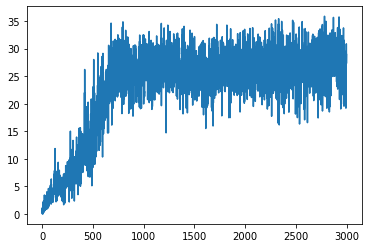

In [1]:
#**This is the solved environment for only one reacher agent. 
#**There is a bug on the unity engine in MAC. You cannot start two unity environments in the same app
#**even if you close on with env.close(). Therefore you must run this cell individually. 

from unityagents import UnityEnvironment
import numpy as np

import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *

env = UnityEnvironment(file_name="Reacher_1_agent.app.app")

# Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

# In[3]:


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# ### 2. Examine the State and Action Spaces
# 
# In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.
# 
# The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.
# 
# Run the code cell below to print some information about the environment.

# In[4]:


# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])


# ### 3. Take Random Actions in the Environment
# 
# In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.
# 
# Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  
# 
# Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

# In[5]:

states = env_info.vector_observations                  # get the current state (for each agent)

load_modelz = False       #**DO we wish to begin with a checkpoint model? 
modelz_list = [] 
modelz_list.append("MODEL_CHECKPOINT.2535363.actor.pt") #**Loaded checkpoint model
modelz_list.append("MODEL_CHECKPOINT.2535363.actor_target.pt")
modelz_list.append("MODEL_CHECKPOINT.2535363.critic.pt")
modelz_list.append("MODEL_CHECKPOINT.2535363.critic_target.pt")

agent = DDPGagent(load_modelz, modelz_list, env_info)
noise = OUNoise(env_info.previous_vector_actions)
batch_size = 10
rewards = []
avg_rewards = []

#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment
#states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
all_scores = []
last_20 = []
max_games = 0
noise_set = True    #**do we want temporary exploration?
total20 = 0
train_model = True      #**Do we wish to train model? or just play the game?
LR_update_max = 2
thirty_in_row = 0
stop_training = False
throttle_model_update = 0
throttle_model_max = 10 #**well just update the model every 10 steps.
alternate_noise = True
decay_learning_rate = True
update_mem_buff_every = 1

while max_games != 3000 and stop_training == False:
    env_info = env.reset(train_mode=train_model)[brain_name]  # reset the environment
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)
    max_games += 1
    if max_games % 100 == 0: #**We have plenty of hard drive so well check point save every 20 games!
        agent.save_models()        #**NOTE: STARTED OUT with moving average over 20 but made it 100
        if len(last_20) > 5:       #*per requirements of this project.
            total20 = 0
            for idx in last_20:
                total20 += idx
            avg = total20 / len(last_20)
            print("Moving Avg 100 episodes: " + str(avg))  #**We should collect moving average to enusure we learning! 
            last_20 = [] #**Reset previous 20 scores!
    print("Game Number: " + str(max_games))
    t_step = 0

    #-----------------------

    while True:

        states = states.reshape(33)
        actions = agent.get_action(states, train_model) #*well flip to sigmoid in model to get between -1 and 1
        actions = actions.reshape(4)
        if noise_set:
            actions = noise.get_action(actions, t_step)  #**Get some exploration
        if max_games == 3000 and noise_set and alternate_noise:
            noise_set = False
            print("Turning off Exploration")

        env_info = env.step(actions)[brain_name]           # send all actions to tne environment

        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)

        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)

        next_states = next_states.reshape(33)
        da_reward = env_info.rewards[0]
        if da_reward != 0:
            pass
            #print("debug")

        if train_model:     #**We might not want to train!
            if max_games % update_mem_buff_every == 0:
                agent.memory.push(states, actions, da_reward, next_states, dones)

        if train_model:
            if len(agent.memory) > batch_size:
                agent.update(batch_size)
             #   throttle_model_update = 0

        states = next_states                               # roll over states to next time step
        t_step += 1     #**Time Step!
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
    float_score = np.mean(scores)
    float_score = float_score.item()
    all_scores.append(float_score)
    last_20.append(float_score) #***Calculate moving average!

    if decay_learning_rate:
        if float_score >= 30 and LR_update_max:  # **Once we know a lot, lets reduce our learning rate!
            LR_update_max = LR_update_max - 1  # **well only update the learning rate a few times.
            lr1, lr2 = agent.get_learning_rate()
            lr1 = lr1 * .10
            lr2 = lr2 * .10
            agent.update_learning_rate(lr1, lr2)

    if float_score >= 30:  # **Once we know enough, no reason to keep training! :)
        print("Scored over 30, great job little agent!")
        thirty_in_row += 1
    else:
        thirty_in_row = 0
    if thirty_in_row == 100:  #**Once we understand environment lets stop training. 
        print("Appears we understand environment Stop Training little agent!")
        stop_training = True

    # When finished, you can close the environment.

    # In[ ]:


env.close()
print("Writing Final Model Check Point")
agent.save_models()
from matplotlib import pyplot as plt
plt.plot(all_scores)
plt.show()

# ### 4. It's Your Turn!
# 
# Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
# ```python
# env_info = env.reset(train_mode=True)[brain_name]
# ```
